In [69]:
import nltk
from nltk import word_tokenize
import pandas as pd
from nltk.stem import WordNetLemmatizer
from sklearn.svm import SVC
from sklearn.metrics.pairwise import cosine_similarity
# nltk.download()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn. naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import datasets

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
# file_path = 'C:\\Users\\grand\\text mining'
file_path = 'C:\\Users\\ouchu\\text mining'
stop_words = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()
text = []
for num in range(1, 1096):
    with open((file_path+'\\data\\PA1-data\\'+ str(num) + ".txt"), mode='r') as f:
        line = f.read()
        # if num == 11:
        #     print(line)
        line = line.lower()
        word_list = nltk.word_tokenize(line)
        lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
        text.append(lemmatized_output)
        # text.append(line)



In [70]:
lab = []
with open((file_path+'\\data\\training'+ ".txt"), 'r') as f:
    lab = f.read()
lab = lab.split('\n')

In [71]:


x_train = []
x_test = []
y_train = []
y_test = []
label = -1
for i in lab:
    i = i.split()
    i = list(map(int, i))
    
    for j in range(1, len(i)):
        
        if j <= 13:
            # print(i[j], text[i[j]], i[0])
            x_train.append(text[i[j] - 1])
            y_train.append(i[0])
            continue
        # print(i[j])
        x_test.append(text[i[j] - 1])
        y_test.append(i[0])

# print(texts[0:10])
from sklearn.feature_extraction.text import CountVectorizer
length = len(x_test)
binary_vectorizer = CountVectorizer()
binary_vectors = binary_vectorizer.fit_transform(x_test + x_train)
print(binary_vectors.toarray())
x_test = binary_vectors[:length]
x_train = binary_vectors[length:]



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 [2 0 0 ... 0 0 0]]


In [72]:

model = BernoulliNB()
model.fit(x_train,y_train)
predicted_results = []
expected_results = []
expected_results.extend(y_test)
predicted_results.extend(model.predict(x_test))
from sklearn import metrics
print(metrics.classification_report(expected_results, predicted_results))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       0.20      1.00      0.33         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       0.00      0.00      0.00         2
          12       1.00      0.50      0.67         2
          13       0.00      0.00      0.00         2

    accuracy                           0.69        26
   macro avg       0.71      0.69      0.67        26
weighted avg       0.71      0.69      0.67        26



C:\Users\ouchu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ouchu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ouchu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: Unde

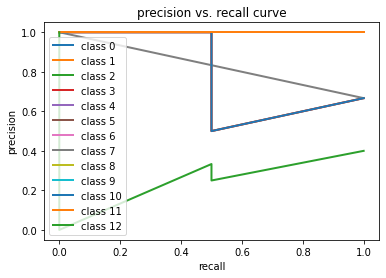

In [73]:
def pr_curve(n_classes, y_test, y_score):

    precision = dict()
    recall = dict()
    
    for i in range(n_classes):
        y = []
        for j in range(len(y_test)):
            if y_test[j] == i+1:
                y.append(1)
            else:
                y.append(0)
        
        # print(y, y_score[:, i])
        precision[i], recall[i], _ = precision_recall_curve(y,
                                                            y_score[:, i])
        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
        
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("precision vs. recall curve")
    plt.show()
pr_curve(13, y_test, model.predict_proba(x_test))

In [81]:
x_train = []
x_test = []
y_train = []
y_test = []
label = -1
for i in lab:
    i = i.split()
    i = list(map(int, i))
    
    for j in range(1, len(i)):
        
        if j <= 13:
            # print(i[j], text[i[j]], i[0])
            x_train.append(text[i[j] - 1])
            y_train.append(i[0])
            continue
        # print(i[j])
        x_test.append(text[i[j] - 1])
        y_test.append(i[0])
texts = x_test + x_train

In [82]:

TFlDF = TfidfVectorizer( lowercase=True, stop_words=set(stop_words), min_df=1)
TFIDF_vectors = TFlDF.fit_transform(texts)
length = len(x_test)


x_test = TFIDF_vectors[:length]
x_train = TFIDF_vectors[length:]

In [83]:
#SVM_model = SVC(kernel='linear', C=1.0)
SVM_model = SVC(kernel='rbf', gamma='scale', C=1.0, probability=True)
# SVM_model = SVC(kernel='poly', degree=2, coef0=1, C=1.0)
SVM_model.fit(x_train,y_train)
predicted_results = []
expected_results = []
expected_results.extend(y_test)
predicted_results.extend(SVM_model.predict(x_test))
print(predicted_results)

print(metrics.classification_report(expected_results, predicted_results))

[1, 1, 2, 2, 6, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2

    accuracy                           0.96        26
   macro avg       0.97      0.96      0.96        26
weighted avg       0.97      0.96      0.96    

In [84]:
SVM_model2 = SVC(kernel='linear', C=1.0, probability=True)

SVM_model2.fit(x_train,y_train)
predicted_results = []
expected_results = []
expected_results.extend(y_test)
predicted_results.extend(SVM_model2.predict(x_test))
print(predicted_results)

print(metrics.classification_report(expected_results, predicted_results))

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00    

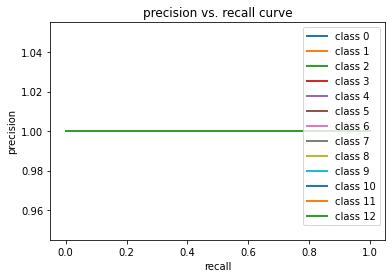

In [85]:
pr_curve(13, y_test, SVM_model2.predict_proba(x_test))

In [79]:
text_index = list(range(0, 1095))
x_train = []
x_test = []
y_train = []
y_test = []
label = -1
for i in lab:
    i = i.split()
    i = list(map(int, i))
    
    for j in range(1, len(i)):
        text_index.remove(i[j] - 1)
        # print(i[j])
        x_train.append(text[i[j] - 1])
        y_train.append(i[0])
for i in text_index:
    x_test.append(text[i])
texts = x_test + x_train

TFlDF = TfidfVectorizer( lowercase=True, stop_words=set(stop_words), min_df=1)
TFIDF_vectors = TFlDF.fit_transform(texts)
length = len(x_test)
x_test = TFIDF_vectors[:length]
x_train = TFIDF_vectors[length:]

In [ ]:
SVM_model2 = SVC(kernel='linear', C=1.0)

SVM_model2.fit(x_train,y_train)
predicted_results = []
predicted_results.extend(SVM_model2.predict(x_test))
# print(predicted_results)

In [ ]:
import csv
with open((file_path+'\\data\\sub'+ ".csv"), 'w+', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Id', 'Value'])
    cnt = 0
    for i in text_index:
        # print(i)
        writer.writerow([i + 1, predicted_results[cnt]])
        cnt += 1